<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Germán Urrea
- Nombre de alumno 2: -


### **Link de repositorio de GitHub:** `https://github.com/G-Urrea/labs_mds_german_urrea`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import gdown

try:
  df = pd.read_csv('diabetes_data.csv')
except:
  url = "https://drive.google.com/uc?id=1wAnrKkhUr3Xz-nbKZgu-N5uwALUZOtgx"
  gdown.download(url, 'diabetes_data.csv')
  df = pd.read_csv('diabetes_data.csv')
df.head(4)

Downloading...
From: https://drive.google.com/uc?id=1wAnrKkhUr3Xz-nbKZgu-N5uwALUZOtgx
To: /content/diabetes_data.csv
100%|██████████| 5.29M/5.29M [00:00<00:00, 96.9MB/s]


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Primero se revisan brevemente las caracteristicas



In [ ]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


Es interesante notar que
1. Sólo existen características numéricas
2. No hay desbalance de clases

### Preprocesado
Dado que sólo existen característica numéricas, se opta por aplicar un escalado simple con un MinMaxScaler, de forma que todas las variables estén en el mismo dominio. Dado que en posteriores pasos se busca determinar las features más importantes, no se quita ninguna. Por último, se opta por un split estándar 80:20 en conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier


In [ ]:
ct = ColumnTransformer(
    [
    ('scaling', MinMaxScaler(), [x for x in df.columns if x!='Diabetes'])
    ],
    remainder = 'passthrough')
ct.set_output(transform = "pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling', MinMaxScaler(),
                                 ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI',
                                  'Smoker', 'HeartDiseaseorAttack',
                                  'PhysActivity', 'Fruits', 'Veggies',
                                  'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
                                  'PhysHlth', 'DiffWalk', 'Stroke',
                                  'HighBP'])])

In [ ]:
pipe = Pipeline([
        ('scaling', ct),
        ('clf', XGBClassifier(random_state = 42))
        ])

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['Diabetes'])
y = df['Diabetes']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify = y, random_state=42)

### Entrenamiento

Para intentar mejorar los resultados de clasificación, se aplicará una busqueda en grilla sencilla, priorizando el modelo con mejor accuracy. En este caso se alterarán los siguientes parámetros:
- ETA: También conocido como learning rate, se utilza para escalar el peso de los parámetros en cada actualización.
- Max depth: Profundidad del árbol, entre más profundo, más complejo el modelo.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
params = {'clf__booster': ['gbtree'],
          'clf__eta': [0.3, 0.5, 0.7],
          'clf__max_depth': [3, 6]
          }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv = 3, scoring = 'accuracy')

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaling',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'Sex',
                                                                          'HighChol',
                                                                          'CholCheck',
                                                                          'BMI',
                                                                          'Smoker',
                                                                          'HeartDiseaseorAttack',
                                                                          'PhysActivity',
                                                                          'Fruits',
                                                                          'Veggies',
                                                                          'HvyAlcoholConsump',
                                                                          'GenHlth',
                                                                          'MentHlth',
                                                                          'PhysHlth',
                                                                          'DiffWalk',
                                                                          'Stroke',
                                                                          'HighBP'])])),
                                       ('clf',
                                        XGBClassifie...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             param_grid={'clf__booster': ['gbtree'],
                         'clf__eta': [0.3, 0.5, 0.7],
                         'clf__max_depth': [3, 6]},
             scoring='accuracy')

Los mejores hiperparámetros se dan con una configuración ligeramente distinta de la default, en este caso sólo cambia la profundidad, pues se utiliza 3 en lugar de 6, que es la default.

In [ ]:
print(grid.best_params_)

{'clf__booster': 'gbtree', 'clf__eta': 0.3, 'clf__max_depth': 3}


In [ ]:
best_xgb = grid.best_estimator_

Para medir los resultados de clasificación, se utilizan las métricas estándar: Precision, Recall, F1 y accuracy.

 En la métrica Precision se busca conocer cuantas de las predicciones de diabetes son correctas, mientras que con el recall se intenta entender cuantas de las predicciones de diabetes han acertado respecto a los casos de diabetes. De acuerdo a estas métricas, el modelo no es ideal pero corresponde a una base decente para trabajar el problema. En particular, el rendimiento para ambas clases es bastante mejorable, alrededor de $0.75$ en la métrica F1, que es una ponderación de Precision y Recall.

 Las métricas utilizadas pueden ser útiles para dar cierta intuición de la calidad de las features, por ejemplo, se podría quitar una feature del entrenamiento y ver como afecta a las métricas. Sin embargo el uso de otras métricas o métodos especializadas podría resultar más beneficioso para determinar el impacto de las features en el modelo.

In [ ]:
print(classification_report(y_test, best_xgb.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

In [ ]:
importances = best_xgb.named_steps['clf'].feature_importances_


In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

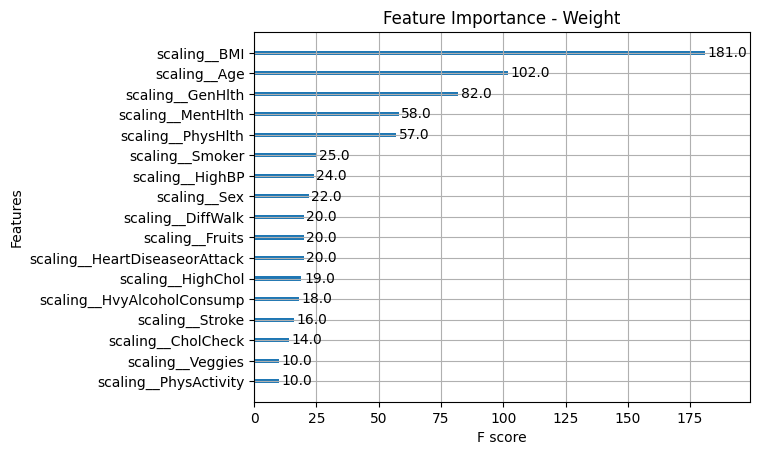

In [ ]:
plot_importance(best_xgb.named_steps['clf'], importance_type = 'weight')
plt.title('Feature Importance - Weight')
plt.show()

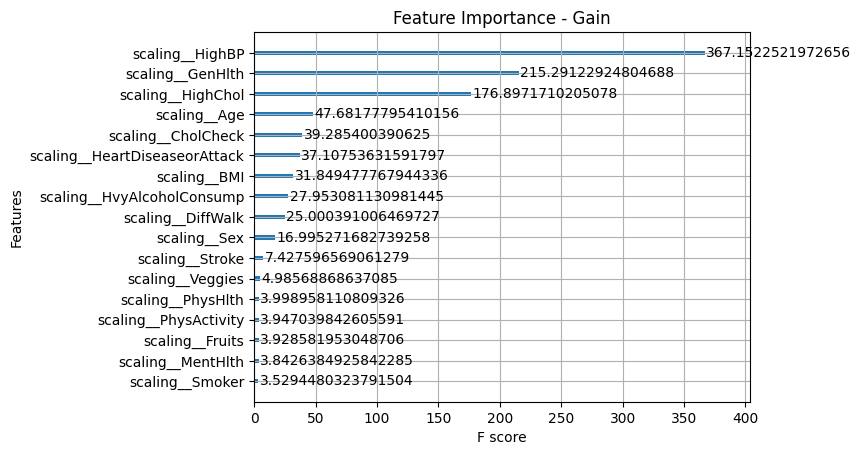

In [ ]:
plot_importance(best_xgb.named_steps['clf'], importance_type = 'gain')
plt.title('Feature Importance - Gain')
plt.show()

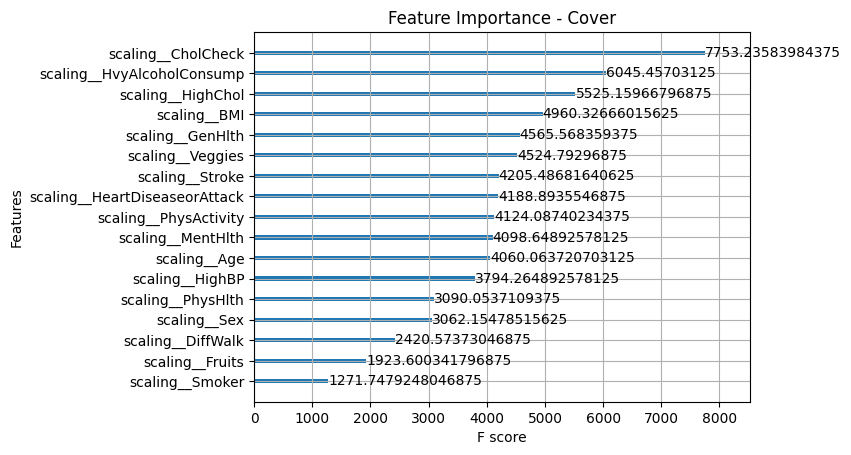

In [ ]:
plot_importance(best_xgb.named_steps['clf'], importance_type = 'cover')
plt.title('Feature Importance - Cover')
plt.show()

### Análisis

¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

- Para el criterio **Gain**, que se determina por la mejora en la métrica de rendimiento obtenida al dividir los datos utilizando esa característica, se tiene que las caracteristicas más relevantes son  `HighBP`, `GenHlth` y `HighChol`.
- Para el criterio **Cover**, que se determina por la cantidad de muestras de entrenamiento que se ven afectadas por las divisiones que utilizan esa característica en todos los árboles de decisión, se priorizan las caracteristicas `CholCheck`, `HvyAlcoholConsump` y `HighChol`.
- Para el criterio **Weight**, que representa el número total de veces que se utiliza una caracteristica para dividir los datos en todos los árboles de decisión del modelo, las caracteristicas priorizadas son `BMI`, `Age` y `GenHlth`.

Es claro que entre los 3 criterios se priorizan caracteristicas distintas, aún así, entre las más relevantes se repiten `GenHlth` y `HighChol`. La diferencia entre la importancia de las features depende de la naturaleza de la métrica, por ejemplo, la caracteristica `HighBP` puede ser más relevante para mejorar el *accuracy* del clasificador, pero no aparecer en una gran cantidad de divisiones relevantes de los árboles.

Las importancias entregadas son una buena base para analizar caracteristicas relevantes en las predicciones del modelo, sin embargo, falta una métrica unificada para terminar de decidir que características son las más relevantes. Adicionalmente, dada la naturaleza de los modelos basados en árboles en donde caracteristicas con muchos valores suelen aparecer con mayor frecuencia en las divisiones, podrían haber ciertas tendencias hacia características más variables.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np

In [ ]:
clf = best_xgb
result = permutation_importance(clf, x_train, y_train, n_repeats=30, random_state=42)

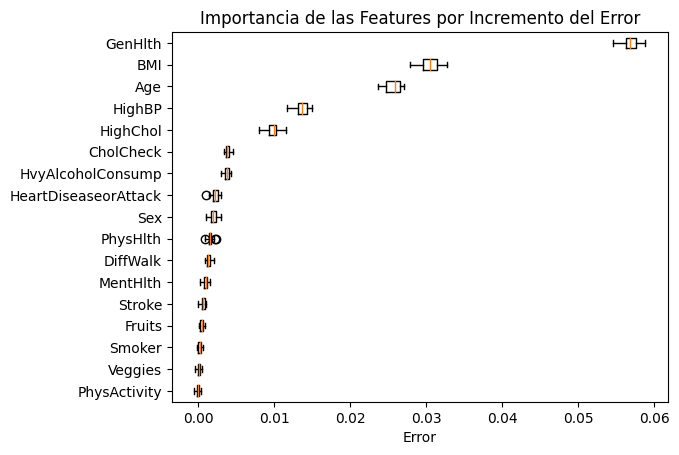

In [ ]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(x_train.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

In [ ]:
print('Desviaciones por feature')
perm_sorted_idx = result.importances_std.argsort()
for i in perm_sorted_idx:
  label = np.array(x_train.columns)[i]
  print(f"{round(result.importances_std[i],5)}: {label}")

Desviaciones por feature
0.0002: PhysActivity
0.00021: Veggies
0.00021: Fruits
0.00023: Smoker
0.00027: Stroke
0.00028: MentHlth
0.0003: DiffWalk
0.00031: CholCheck
0.00031: HvyAlcoholConsump
0.00035: PhysHlth
0.00046: HeartDiseaseorAttack
0.00048: Sex
0.00075: HighChol
0.00086: HighBP
0.00094: GenHlth
0.00099: Age
0.00124: BMI


La desviación estandar en este caso representa la variabilidad de la importancia al permutar el valor de una feature, osea, su estabilidad como feature importante. En este caso es curioso notar que las features más importantes también poseen una mayor desviación, sin embargo esto tiene sentido, pues aquellas features menos importantes tenderán a afectar menos las métricas, teniendo desviaciones menores y más estables.

### Análisis

¿Cómo mide la importancia de las features su propuesta?

- La importancia por permutación busca evaluar que tanto afecta el scoring del modelo cuando el valor de una sola caracteristica es intercambiado de forma aleatoria, de esta forma determinando que tan dependiente es el modelo de dicha caracteristica.

¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- En este caso las features más importantes son `GenHlth`, `BMI`, `Age`, `HighBP` y `HighChol`. Esto tiene sentido, pues factores como un mayor peso y edad suelen asociarse a un mayor riesgo de diabetes, mientras que factores como el nivel de colesterol y presión suelen ser afectados por la existencia de diabetes.

¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?

- Se repiten algunas de las features observadas anteriormente, como `HighChol` y `GenHlth`. Gracias a esto se puede concluir que, aquellas features que han sido determinadas como las más importanto tanto con el método actual como con los criterios de XGBoost, son features clave para el modelo de clasificación

Nombre y explique 3 ventajas y 3 desventajas del método implementado.
- Entre las ventajas está el hecho de que no es necesario re-entrenar el modelo, es un método comparable para distintos modelos y toma en cuenta las interacciones entre features. Entre las desventajas está el hecho de que el método está enlazado al error global, puede darse una menor importancia a un par de features si estas están correlacionadas y que es necesario tener acceso a los labels.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.2 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
# TreeExplainer no acepta pipelines, es necesario escalar manualmente
# Se usa el conjunto de test para evitar bias por datos ya vistos, así como para disminuir el poder de procesamiento requerido
minmax = MinMaxScaler().fit(x_test)
minmax.set_output(transform="pandas")
x_scaled = minmax.transform(x_test)

In [ ]:
import shap
explainer = shap.TreeExplainer(clf.named_steps['clf'])
shap_values = explainer(x_scaled)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


¿Qué representa cada número en su resultado?
- Cada número representa la contribución de una caracteristica a la predicción del modelo. En este caso se tienen los valores base, correspondientes a la contribución esperada, y los valores individuales calculados para cada muestra.

¿Es posible atribuir un significado a la positividad/negatividad de cada valor?
- En general el signo de un valor para una caracteristica determina el aporte que realiza esta en la predicción, de esta forma, en un problema de clasificación binaria un aporte negativo contribuiría a una predicción negativa, mientras que un aporte positivo a una predicción positiva.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

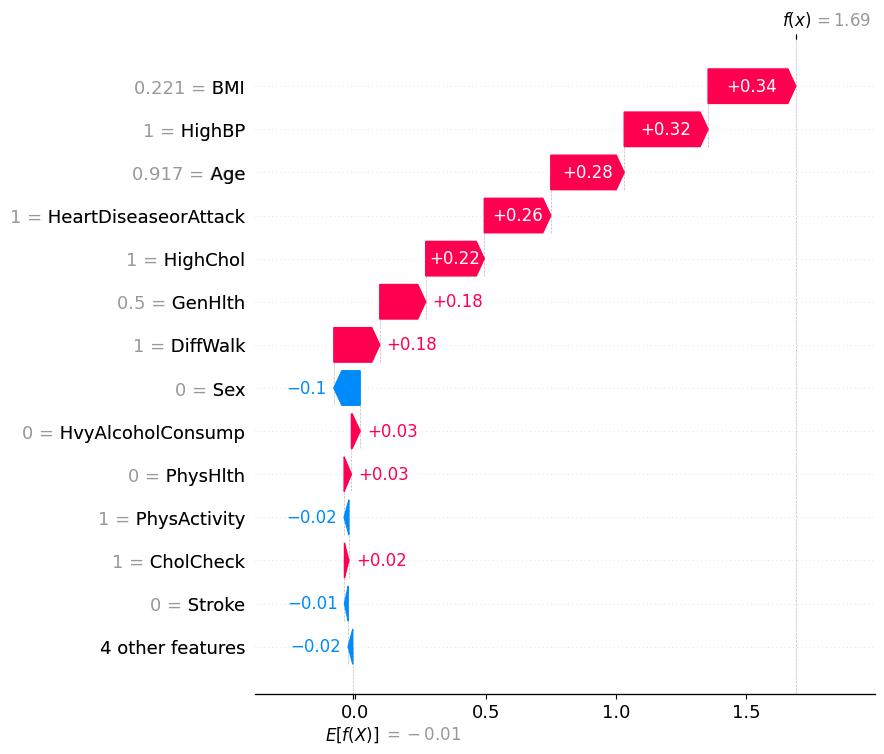

In [ ]:
idx = 1

shap.initjs()
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

En este caso hay multiples variables con un aporte positivo (mayor probabilidad de diabetes), en particular las variables `BMI`, `HighBP` y `Age` destacan.

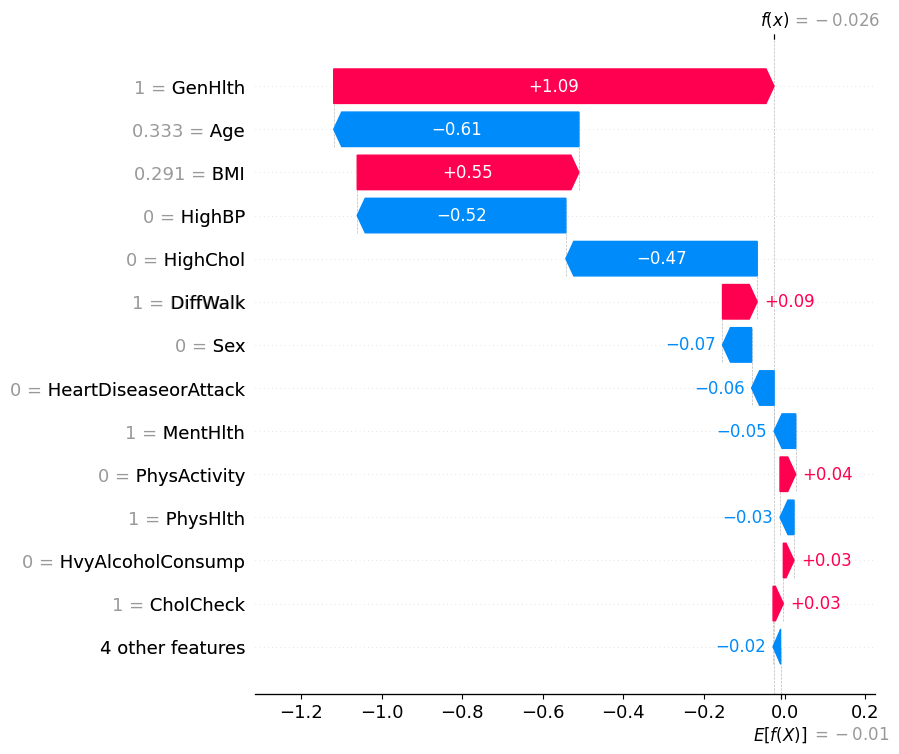

In [ ]:
idx = 9

shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

En este caso el número de variables con aporte positivo y negativo están más equilibradas. En ese sentido aquellas con un aporte negativo más relevante son `Age`, `HighBP` y `HighChol`, mientras que `GenHlth` y `BMI` representan un aporte positivo.

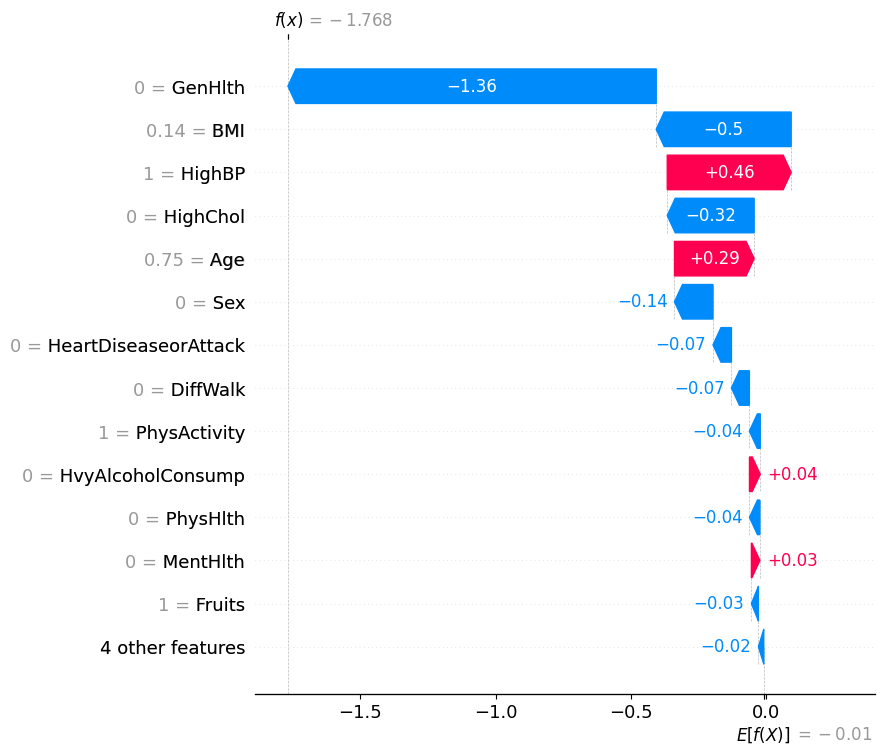

In [ ]:
idx = 150

shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

Los aportes negativos más relevantes se dan con `GenHlth`, `BMI` y `HighChol`, los tres con valores bajos. Por otro lado, los aportes positivos relevantes los dan `HighBP` y `Age`.

### Análisis

Entre las muestras han surgido algunos patrones:
- `Age` alto suele asociarse con un aporte positivo.
- `HighBP` y `HighChol` positivos suele ser aportes positivos, mientras que cuando son negativos (en un sentido binario) son aportes negativos.

Si bien del análisis individual de muestras se pueden sacar algunas conclusiones, para generalizar estas conclusiones se tendría que realizar un análisis global del aporte de cada feature.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


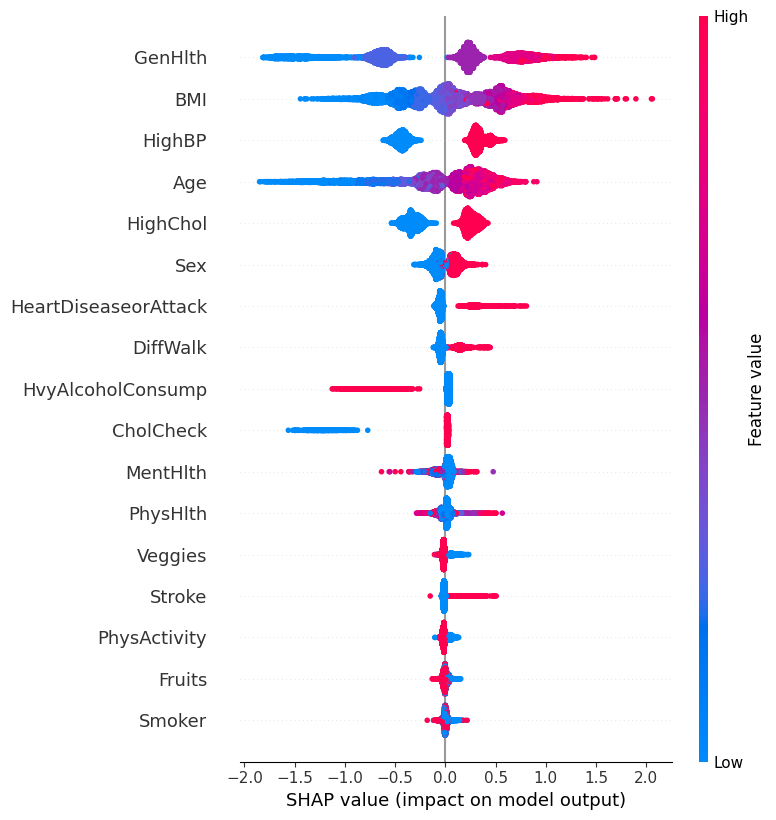

In [ ]:
shap.summary_plot(shap_values, x_scaled)

Del gráfico se extrae que es común que valores bajos o negativos (en un sentido binario) resulten en un aporte negativo al modelo, como en las variables `GenHlth`, `BMI`,  `HighBP`, `Sex`, etc. Algunas excepciones se dan en, por ejemplo, las variables `Veggies` y `Smoker`, en donde valores más bajos se convierten en aportes positivos. Del análisis global de aporte, realmente no hay indicios de contradicción con las tendencias observadas a nivel local.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = x.columns[shap_values_abs.argsort()[::-1]]

In [ ]:
feature_importance_names

Index(['GenHlth', 'BMI', 'HighBP', 'Age', 'HighChol', 'Sex',
       'HeartDiseaseorAttack', 'DiffWalk', 'HvyAlcoholConsump', 'CholCheck',
       'MentHlth', 'PhysHlth', 'Veggies', 'Stroke', 'PhysActivity', 'Fruits',
       'Smoker'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_shap(shap_values, name, colors):

  feature = shap_values[:, name]
  fig = px.scatter(x = feature.data, y = feature.values, color = colors,
                  #color_continuous_scale=px.colors.sequential.Viridis,
                   #opacity=0.005,
                   labels = {'y':f"SHAP {name}", 'x': f"{name}",'color':'Diabetes'})
  fig.show()

In [ ]:
import plotly.express as px

In [ ]:
plot_shap(shap_values, feature_importance_names[0], y_test)

Para la variable `GenHlth` se hace evidente que los SHAP values son crecientes de acuerdo al valor de la variable. Por otro lado parecen haber tendencias en la cantidad de casos de diabetes de acuerdo a los valores SHAP, pues losc asos positivos suelen ser más comunes a medida que el valor SHAP aumenta.

In [ ]:
plot_shap(shap_values, feature_importance_names[1], y_test)

Para el `BMI` se hace evidente un comportamiento creciente de los SHAP values en el rango [0, 0.5], este comportamiento también existe con la presencia de diabetes, en donde son más comunes casos positivos de diabetes a medida que aumente el `BMI`. Por otro lado en el rango [0.5, 0.7] hay una tendencia a SHAP values superiores a 0.5 y una marcada presencia de diabetes, en el rango [0.7, 0.8] escasean casos de diabetes, mientras que son más abundantes en el rango [0.8, 1]

In [ ]:
plot_shap(shap_values, feature_importance_names[2], y_test)

 Para la variable `HighBP` existen más casos de diabetes con SHAP values positivos, en este contexto es de notar que el aporte cambia de signo de acuerdo al valor binario de `HighBP`, siendo un aporte positivo con `HighBP`=1.

In [ ]:
plot_shap(shap_values, feature_importance_names[3], y_test)

Para la variable `Age` existe una relación creciente entre el valor de la variable y el valor SHAP, en particular es de notar que en aportes negativos hay una menor cantidad de casos de diabetes, mientras que estos suelen aparecer con más frecuencia a mayor `Age` y valor SHAP.

In [ ]:
plot_shap(shap_values, feature_importance_names[4], y_test)

El comportamiento en `HighChol` es muy similar a `HighBP`, en donde el signo del aporte se da por el valor binario de la variable, y hay mayor abundancia de casos de diabetes en aportes positivos.

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

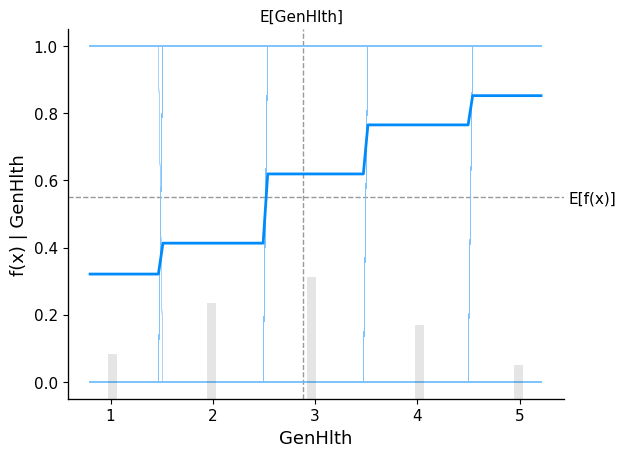

In [ ]:
x1000 = shap.utils.sample(x_test, 1000, random_state=42)

shap.partial_dependence_plot(
    feature_importance_names[0], clf.predict, x1000, model_expected_value=True,
    feature_expected_value=True, ice=True
    )

Del PDP de `GenHlth`, se observa la tendencia hacia predicciones positivas a medida que aumenta el valor de la variable.

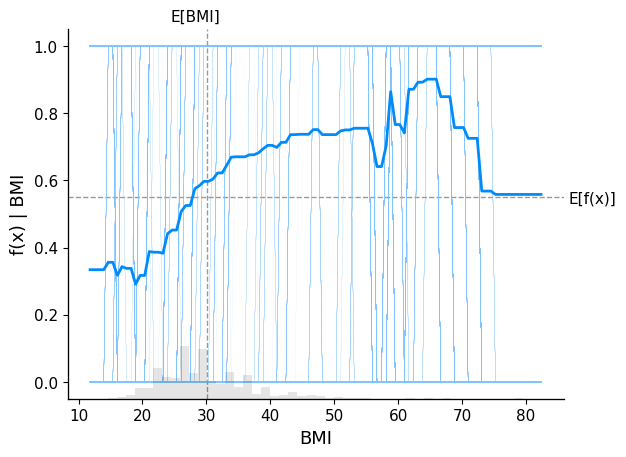

In [ ]:
shap.partial_dependence_plot(
    feature_importance_names[1], clf.predict, x1000, model_expected_value=True,
    feature_expected_value=True, ice=True
    )

Para la variable `BMI` si bien no hay un comportamiento monotono, en general hay una tendencia hacia la diabetes con valores más altos de `BMI`, este resultado esperado puede ser un poco más bajo en ocasiones, como por ejemplo para para los `BMI` mayores de 70.

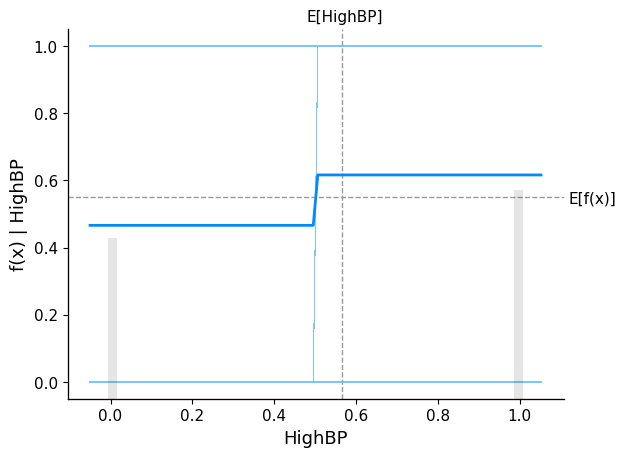

In [ ]:
shap.partial_dependence_plot(
    feature_importance_names[2], clf.predict, x1000, model_expected_value=True,
    feature_expected_value=True, ice=True
    )

Para la variable `HighBP` el valor esperado aumenta junto al valor de la variable, lo cual tiene sentido, pues se esperaría una mayor porbabilidad de diabetes cuando existe presión alta en la sangre.

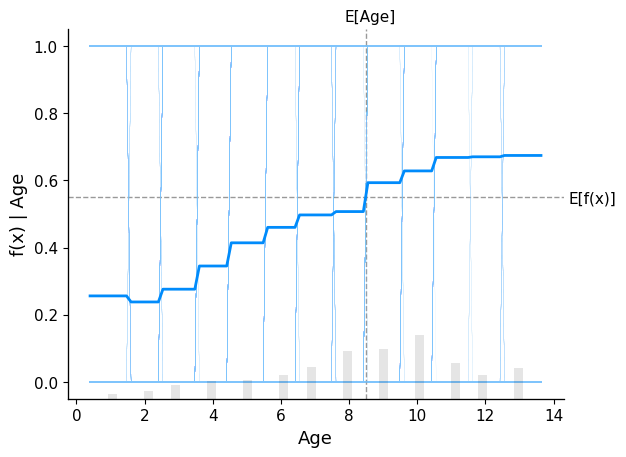

In [ ]:
shap.partial_dependence_plot(
    feature_importance_names[3], clf.predict, x1000, model_expected_value=True,
    feature_expected_value=True, ice=True
    )

Para la variable `Age` se espera que en promedio, la probabilidad de diabetes aumente junto a la edad, el cual es un factor conocido de riesgo de diabetes.

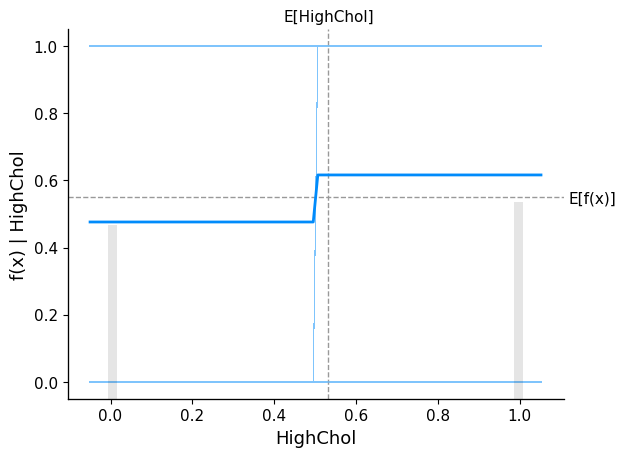

In [ ]:
shap.partial_dependence_plot(
    feature_importance_names[4], clf.predict, x1000, model_expected_value=True,
    feature_expected_value=True, ice=True
    )

Para la variable `HighChol` existe un comportamiento similar que para la variable `HighBP`, en donde un valor más alto implica una probabilidad más alta de diabetes.

Si bien en base a lo que ya se ha visto de las variables, el PDP refuerza la idea de estas tendencias para el dataset general, solamente con el PDP no es posible generalizar esto a todos los datos, pues la muestra es tan solo una pequeña parte de todo el dataset y siempre existe la posibilidad de que esta no sea completamente representativa de todos los datos.

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
explainer = AnchorTabular(clf.named_steps['clf'].predict, feature_names = clf.feature_names_in_, seed=1)
# Necesario escalado manual
minmax = MinMaxScaler().fit(x_train)
x_train_scaled = minmax.transform(x_train)

explainer.fit(x_train_scaled)

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 1, 'disc_perc': (25, 50, 75)},
  'version': '0.9.3'}
)

In [ ]:
idx = 1000

print(f"Muestra: {idx}")
explanation = explainer.explain(x_scaled.to_numpy()[idx], threshold=0.95)
print('Prediction: ', explainer.predictor(x_scaled.to_numpy()[idx].reshape(1, -1))[0])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print()

idx = 3001

print(f"Muestra: {idx}")
explanation = explainer.explain(x_scaled.to_numpy()[idx], threshold=0.95)
print('Prediction: ', explainer.predictor(x_scaled.to_numpy()[idx].reshape(1, -1))[0])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print()


idx = 5751
print(f"Muestra: {idx}")
explanation = explainer.explain(x_scaled.to_numpy()[idx], threshold=0.95)
print('Prediction: ', explainer.predictor(x_scaled.to_numpy()[idx].reshape(1, -1))[0])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)


Muestra:1000
Prediction:  1
Anchor: GenHlth > 0.25 AND HeartDiseaseorAttack > 0.00 AND BMI > 0.24
Precision: 0.99
Coverage: 0.04

Muestra:3001
Prediction:  1
Anchor: BMI > 0.19 AND HighBP > 0.00 AND Age > 0.67
Precision: 0.97
Coverage: 0.14

Muestra:5751
Prediction:  0
Anchor: GenHlth <= 0.25 AND HighBP <= 0.00 AND BMI <= 0.14
Precision: 1.00
Coverage: 0.11


- Para la muestra 1000 se decide que es un caso de diabetes, pues `GenHlth` es mayor a 0.25, `HeartDiseaseorAttack` es mayor a 0 (en este caso sería 1) y `BMI` es mayor a 0.24.
- Para la muestra 3001 se decide que es un caso de diabetes en base a valores sobre un umbral para las variables `BMI`, `Age` y `HighBP` (que en este caso valdría 1).
- Para la muestra 5751 se decide que no es un caso de diabetes, esto pues las variables `GenHlth`, `BMI` y `HighBP` tienen un valor por debajo de un umbral.

En general estas reglas poseen una baja cobertura (0.04, 0.14 y 0.11 respectivamente), por lo que no serían de utilidad para explicar más que un selecto grupo de predicciones.

Por otro lado, las precisiones de estas reglas son muy altas (0.99, 0.97 y 1) respectivamente, por lo que las reglas son muy útiles para explicar los puntos que cubren.

En general las reglas propuestas tienen sentido para las observaciones visualizadas, pues si bien respecto al dataset completo cubren una pequeña cantidad de estas, logran explicar la gran mayoría de las cubiertas de forma correcta. Aún así es de recalcar que las reglas observadas son muy limitadas, evidenciado por el bajo coverage, por lo que no se puede asegurar que tengan sentido a nivel de dataset.

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Para la tarea de clasificación de diabetes, tanto un análisis general de los SHAP values como el método de permutación permiten tener una idea general de las features con mayor relevancia en la determinación de diabetes, esto debido a la facil determinación de las caracteristicas más relevantes para el conjunto de datos y, en el caso de los SHAP values, la visualización del aporte de las features.

En el caso del Dr. Simi, quien busca maximizar la interpretabilidad del modelo, le es más conveniente utilizar métodos locales, pues métodos como los SHAP values permiten entender mejor el tipo de predicción que realizará el modelo de acuerdo a los valores que tome una variable y el aporte que signifique tener dicho valor.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>